In [36]:
import gymnasium as gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np

In [53]:
env = gym.make('Pendulum-v1', render_mode="human")
obs = env.reset()

obs_rew = []

over = False
while not over:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

    obs_rew.append(reward)
    over = terminated or truncated

env.close()

-8.214803240557842


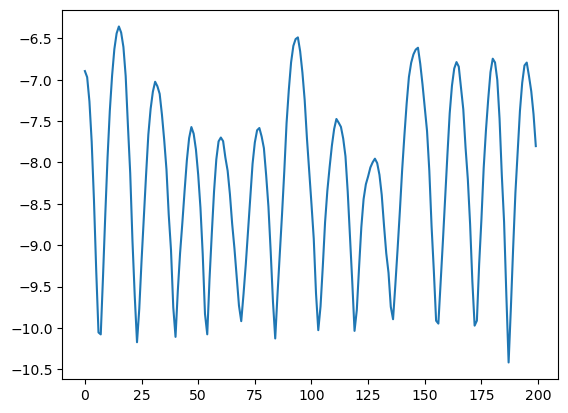

In [54]:
print(np.array(obs_rew).mean())
plt.plot(obs_rew)

In [112]:
model = PPO("MlpPolicy", 
            "Pendulum-v1",
            verbose=1,
            learning_rate=3e-4,
            batch_size=64,
            n_steps=2048
)

model.learn(200_000)

Using cpu device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.28e+03 |
| time/              |           |
|    fps             | 7630      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.27e+03   |
| time/                   |             |
|    fps                  | 4744        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001960136 |
|    clip_fraction        | 0.0101     

In [119]:
vec_env = model.get_env()
obs = vec_env.reset()

obs_rew = []

done = False
while not done:
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)

    obs_rew.append(reward)

env.close()

-0.6400699


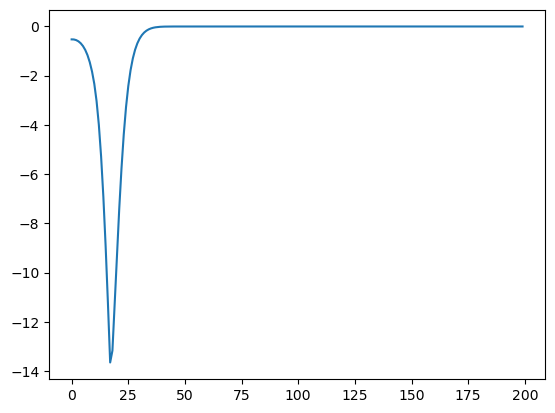

: 

In [ ]:
print(np.array(obs_rew).mean())
plt.plot(obs_rew)